# Feature Engineering

In this notebook, we will enhance our dataset by creating new features that can help improve model performance. We will focus on:
1. **Log Transformations**: To handle skewed distributions.
2. **Polynomial Features**: To capture non-linear relationships.
3. **Interaction Terms**: To capture combined effects of features.
4. **Feature Scaling**: To standardize features for models that require it.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

### 1. Load Data

In [14]:
# Load the cleaned data from the previous step (assuming it was saved, otherwise we reload and re-clean)
# Since we modified the cleaning logic in memory in the previous notebook but didn't explicitly save to a new file,
# we will replicate the cleaning steps here for consistency.

df = pd.read_csv("../data/raw/boston.csv")

# Outlier Removal (Corrected Logic)
cols_to_filter = df.columns[df.columns != 'CHAS']
Q1 = df[cols_to_filter].quantile(0.25)
Q3 = df[cols_to_filter].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[cols_to_filter] < (Q1 - 1.5 * IQR)) | (df[cols_to_filter] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Data shape after cleaning: {df.shape}")

Data shape after cleaning: (288, 14)


### 2. Log Transformations
Features like `CRIM` and `DIS` are often skewed. We will apply log transformation to reduce skewness.

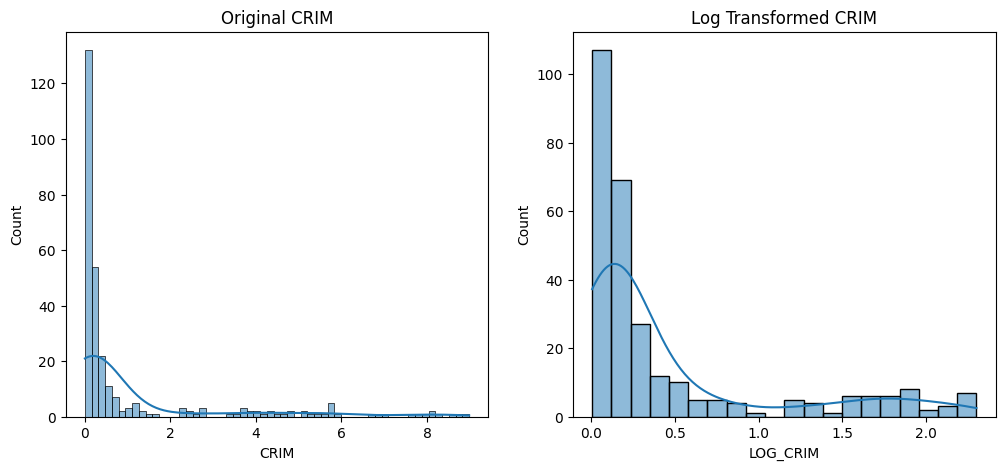

In [15]:
skewed_features = ['CRIM', 'DIS']

for feature in skewed_features:
    df[f'LOG_{feature}'] = np.log1p(df[feature])

# Visualize the effect
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['CRIM'], ax=axes[0], kde=True).set_title('Original CRIM')
sns.histplot(df['LOG_CRIM'], ax=axes[1], kde=True).set_title('Log Transformed CRIM')
plt.show()

### 3. Polynomial Features
The relationship between `LSTAT` and `MEDV` is non-linear. We will add a squared term for `LSTAT`.

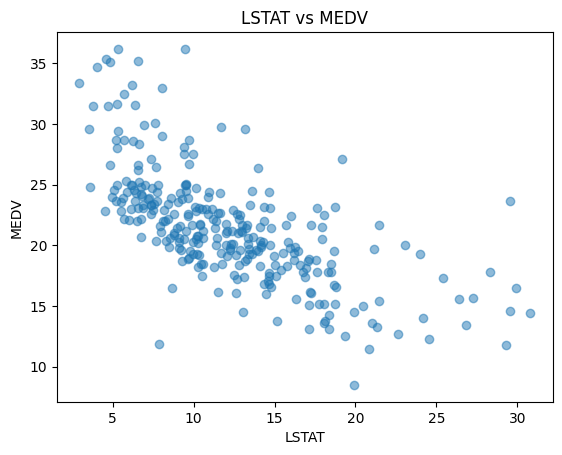

In [16]:
df['LSTAT_2'] = df['LSTAT'] ** 2

plt.scatter(df['LSTAT'], df['MEDV'], alpha=0.5, label='Original')
plt.title('LSTAT vs MEDV')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

### 4. Interaction Terms
We can create interaction terms to capture combined effects. For example, `RM` (rooms) and `LSTAT` (status) might interact.

In [17]:
df['RM_LSTAT'] = df['RM'] * df['LSTAT']
df['RM_TAX'] = df['RM'] * df['TAX']

### 5. Feature Scaling
We will use StandardScaler to scale our features. Note: We usually split data before scaling to avoid leakage, but for this exercise we will scale the entire dataset and save it.

In [18]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('MEDV', axis=1))
df_scaled = pd.DataFrame(scaled_features, columns=df.columns.drop('MEDV'))
df_scaled['MEDV'] = df['MEDV'].values

print("Data scaled successfully.")
df_scaled.head()

Data scaled successfully.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,LOG_CRIM,LOG_DIS,LSTAT_2,RM_LSTAT,RM_TAX,MEDV
0,-0.527185,1.664457,-1.349224,-0.273179,0.010460,0.929372,-0.070046,0.076882,-0.902191,-0.469431,-1.987254,0.707109,-1.320184,-0.733659,0.249112,-0.914777,-1.385235,-0.324020,24.0
1,-0.516632,-0.446502,-0.586313,-0.273179,-0.679901,0.577435,0.450234,0.584447,-0.755642,-0.851841,-0.548663,0.707109,-0.557661,-0.700289,0.713279,-0.564433,-0.506260,-0.770830,21.6
2,-0.516642,-0.446502,-0.586313,-0.273179,-0.679901,2.323406,-0.225750,0.584447,-0.755642,-0.851841,-0.548663,0.342010,-1.494318,-0.700321,0.713279,-0.965829,-1.513567,-0.560261,34.7
3,-0.514088,-0.446502,-1.370059,-0.273179,-0.789959,1.896054,-0.806793,1.218166,-0.609094,-0.993474,-0.030770,0.503479,-1.694114,-0.692347,1.205218,-1.011142,-1.797523,-0.771201,33.4
4,-0.495647,-0.446502,-1.370059,-0.273179,-0.789959,2.236564,-0.487789,1.218166,-0.609094,-0.993474,-0.030770,0.707109,-1.256030,-0.635911,1.205218,-0.893254,-1.203981,-0.733529,36.2


### 6. Save Processed Data

In [19]:
df.to_csv("../data/processed/boston_engineered.csv", index=False)
df_scaled.to_csv("../data/processed/boston_scaled.csv", index=False)
print("Feature engineering complete. Data saved to:")
print("- ../data/processed/boston_engineered.csv (Original Scale)")
print("- ../data/processed/boston_scaled.csv (Standard Scaled)")

Feature engineering complete. Data saved to:
- ../data/processed/boston_engineered.csv (Original Scale)
- ../data/processed/boston_scaled.csv (Standard Scaled)
